# Tinkering with Logisitic Regression NN from deeplearning.ai

In [8]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint as pp
from scipy.special import expit # sigmoid function
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [62]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
y = y.reshape(-1, 1)
print(X.shape, y.shape)


(500, 2) (500, 1)


In [63]:
plt.figure(figsize=(6, 4))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Classification Data')
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Figure size 600x400 with 0 Axes>

## Without Vectorization

### Using S.G.D

In [4]:
np.random.seed(42)
w1, w2, b = np.random.randn(3, ) * 0.1
lr = 0.1
m = len(y)
epochs = 10
losses = []
param_history_sgd = [(w1, w2)]

for epoch in range(epochs):
    J = 0
    for i in range(m):
        z = w1*X[i, 0] + w2*X[i, 1] + b
        a = expit(z)
        L = -(y[i]*np.log(a)+ (1-y[i])*np.log(1-a))
        J += L

        dz = a - y[i]
        w1 = w1 - lr*dz*X[i, 0]                   # S.G.D: updated parameters after each sample pass
        w2 = w2 - lr*dz*X[i, 1]
        b = b - lr*dz
        param_history_sgd.append((w1, w2))
    
    losses.append(J/m)
    print(f"Epoch {epoch} - Loss: {J/m}")

print("\nFinal params learned:\nw1:", w1, "w2:", w2, "b:", b)


Epoch 0 - Loss: 0.34869068723488694
Epoch 1 - Loss: 0.2708641011442709
Epoch 2 - Loss: 0.258629351111686
Epoch 3 - Loss: 0.2542146837985566
Epoch 4 - Loss: 0.252283278870464
Epoch 5 - Loss: 0.2513546905821714
Epoch 6 - Loss: 0.250886995884301
Epoch 7 - Loss: 0.2506476807157894
Epoch 8 - Loss: 0.25052666960640163
Epoch 9 - Loss: 0.2504683935163481

Final params learned:
w1: 1.3931872198787019 w2: -5.877914100870015 b: 1.2197643343058882


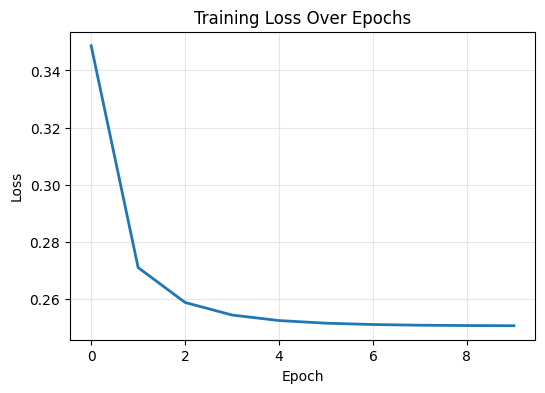

In [5]:
# Plot 1: Training Loss
plt.figure(figsize=(6, 4))
plt.plot(losses, linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
# Predict on Training set
y_z = w1 * X[:, 0] + w2 * X[:, 1] + b
y_pred = expit(y_z)
y_pred_binary = (y_pred > 0.5).astype(int)

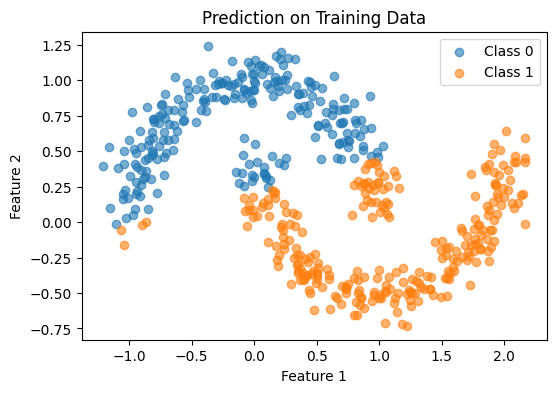

In [7]:
# Prediction on training data
plt.figure(figsize=(6, 4))
plt.scatter(X[y_pred_binary == 0, 0], X[y_pred_binary == 0, 1], label='Class 0', alpha=0.6)
plt.scatter(X[y_pred_binary == 1, 0], X[y_pred_binary == 1, 1], label='Class 1', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Prediction on Training Data')
plt.show()

In [8]:
# Calculate accuracy
accuracy = np.mean(y_pred_binary == y)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score

precision = precision_score(y, y_pred_binary)
recall = recall_score(y, y_pred_binary)
f1 = f1_score(y, y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y, y_pred_binary)
print(f"\nConfusion Matrix:\n{cm}")

# Calculate specificity and sensitivity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print(f"\nSensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

Accuracy: 0.8720
Precision: 0.8470
Recall: 0.9080
F1-Score: 0.8764

Confusion Matrix:
[[209  41]
 [ 23 227]]

Sensitivity (True Positive Rate): 0.9080
Specificity (True Negative Rate): 0.8360


### Using B.G.D

In [18]:
np.random.seed(42)
w1, w2, b = np.random.randn(3) * 0.1
dw1, dw2, db = 0,0,0
lr = 0.1
m= len(y)
epochs = 50
losses = []
param_history_bgd = [(w1, w2)]

for epoch in range(epochs):
    J = 0
    for i in range(m):
        z = w1*X[i, 0] + w2*X[i, 1] + b
        a = expit(z)

        L = -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
        J += L

        dz = a - y[i]
        dw1 += dz * X[i, 0]
        dw2 += dz * X[i, 1]
        db += dz 

    losses.append(J/m)
    w1 = w1 - lr * (dw1 / m)           # B.G.D: updated parameters after all samples pass ONCE through the network
    w2 = w2 - lr * (dw2 / m)
    b = b - lr * (db / m)
    param_history_bgd.append((w1, w2))
    print(f"Epoch {epoch} - Loss: {J/m}")

print("\nFinal params learned:\nw1:", w1, "w2:", w2, "b:", b)


Epoch 0 - Loss: 0.6791339120984442
Epoch 1 - Loss: 0.6699615326333906
Epoch 2 - Loss: 0.652306254389472
Epoch 3 - Loss: 0.6274753522580108
Epoch 4 - Loss: 0.5972516899779109
Epoch 5 - Loss: 0.563690209149468
Epoch 6 - Loss: 0.5288786736045892
Epoch 7 - Loss: 0.4947054232319921
Epoch 8 - Loss: 0.46268180951194005
Epoch 9 - Loss: 0.4338518138271881
Epoch 10 - Loss: 0.4087925529331646
Epoch 11 - Loss: 0.3876831386289849
Epoch 12 - Loss: 0.3704077710736962
Epoch 13 - Loss: 0.3566624082062397
Epoch 14 - Loss: 0.34604557487560494
Epoch 15 - Loss: 0.33812543338832396
Epoch 16 - Loss: 0.33248332626059807
Epoch 17 - Loss: 0.32873809200198567
Epoch 18 - Loss: 0.3265565952706874
Epoch 19 - Loss: 0.3256554211999721
Epoch 20 - Loss: 0.32579755890688233
Epoch 21 - Loss: 0.3267867185897017
Epoch 22 - Loss: 0.3284609448909875
Epoch 23 - Loss: 0.3306864705784684
Epoch 24 - Loss: 0.333352273862592
Epoch 25 - Loss: 0.33636550520697694
Epoch 26 - Loss: 0.33964778037895177
Epoch 27 - Loss: 0.34313225125008

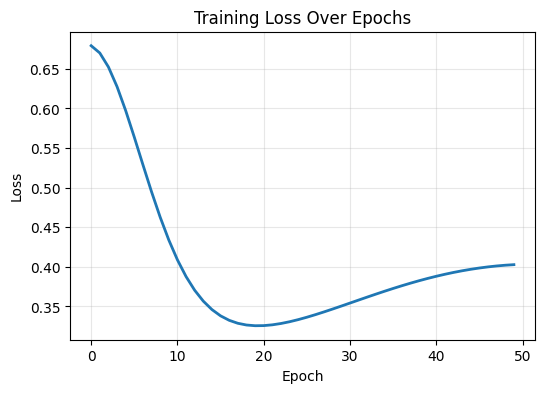

In [19]:
# Plot 1: Training Loss
plt.figure(figsize=(6, 4))
plt.plot(losses, linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True, alpha=0.3)
plt.show()

In [20]:
# Predict on Training set
y_z = w1 * X[:, 0] + w2 * X[:, 1] + b
y_pred = expit(y_z)
y_pred_binary = (y_pred > 0.5).astype(int)

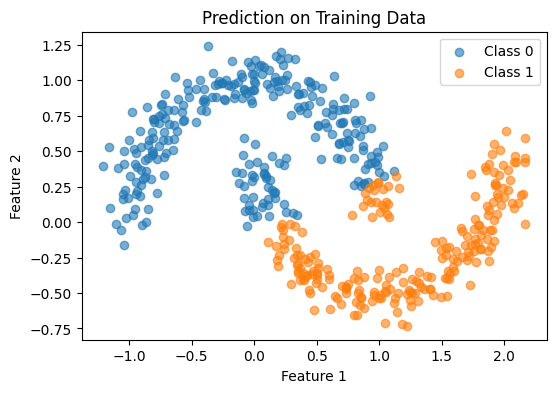

In [21]:
# Prediction on training data
plt.figure(figsize=(6, 4))
plt.scatter(X[y_pred_binary == 0, 0], X[y_pred_binary == 0, 1], label='Class 0', alpha=0.6)
plt.scatter(X[y_pred_binary == 1, 0], X[y_pred_binary == 1, 1], label='Class 1', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Prediction on Training Data')
plt.show()

In [22]:
# Calculate accuracy
accuracy = np.mean(y_pred_binary == y)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score

precision = precision_score(y, y_pred_binary)
recall = recall_score(y, y_pred_binary)
f1 = f1_score(y, y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y, y_pred_binary)
print(f"\nConfusion Matrix:\n{cm}")

# Calculate specificity and sensitivity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print(f"\nSensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

Accuracy: 0.8640
Precision: 0.8991
Recall: 0.8200
F1-Score: 0.8577

Confusion Matrix:
[[227  23]
 [ 45 205]]

Sensitivity (True Positive Rate): 0.8200
Specificity (True Negative Rate): 0.9080


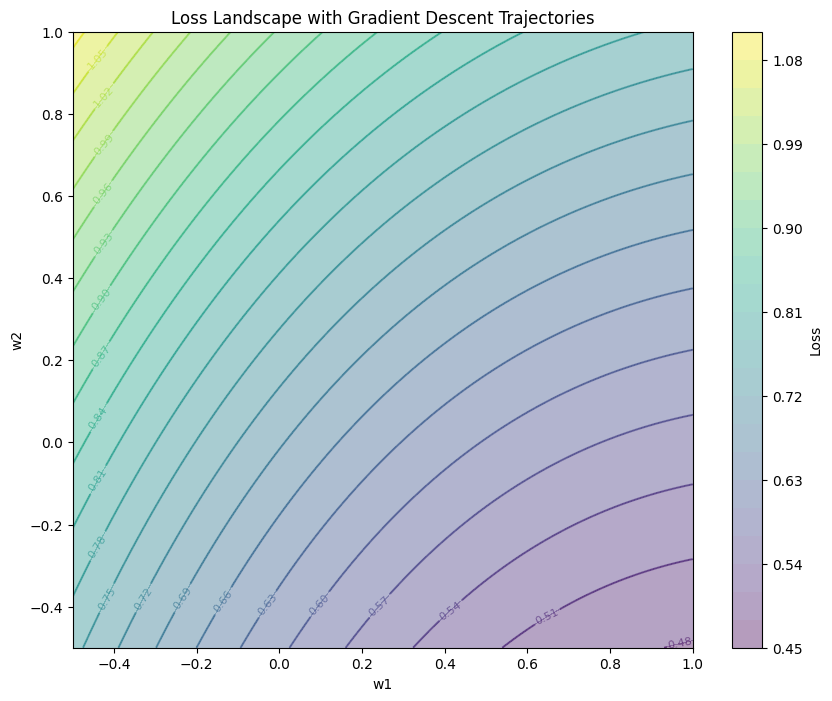

In [23]:
# Add this cell after your imports

def compute_loss_landscape(X, y, w1_range, w2_range, b_fixed=0):
    """Compute loss over a grid of w1 and w2 values"""
    w1_vals = np.linspace(w1_range[0], w1_range[1], 100)
    w2_vals = np.linspace(w2_range[0], w2_range[1], 100)
    W1, W2 = np.meshgrid(w1_vals, w2_vals)
    L = np.zeros_like(W1)
    
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            z = W1[i, j] * X[:, 0] + W2[i, j] * X[:, 1] + b_fixed
            a = expit(z)
            L[i, j] = -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))
    
    return w1_vals, w2_vals, L

# Compute loss landscape
w1_range = (-0.5, 1.0)
w2_range = (-0.5, 1.0)
w1_vals, w2_vals, L = compute_loss_landscape(X, y, w1_range, w2_range, b_fixed=0)

# Plot contour with both trajectories
fig, ax = plt.subplots(figsize=(10, 8))

# Contour plot
contour = ax.contour(w1_vals, w2_vals, L, levels=20, cmap='viridis', alpha=0.6)
ax.clabel(contour, inline=True, fontsize=8)
contourf = ax.contourf(w1_vals, w2_vals, L, levels=20, cmap='viridis', alpha=0.4)

# You'll need to re-run S.G.D and B.G.D while tracking parameter history
# For now, add this tracking to your S.G.D cell:

# In the S.G.D cell, add: param_history_sgd = [(w1, w2)]
# Then after each epoch: param_history_sgd.append((w1, w2))

# And similarly for B.G.D: param_history_bgd = [(w1, w2)]

plt.colorbar(contourf, ax=ax, label='Loss')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_title('Loss Landscape with Gradient Descent Trajectories')
plt.show()

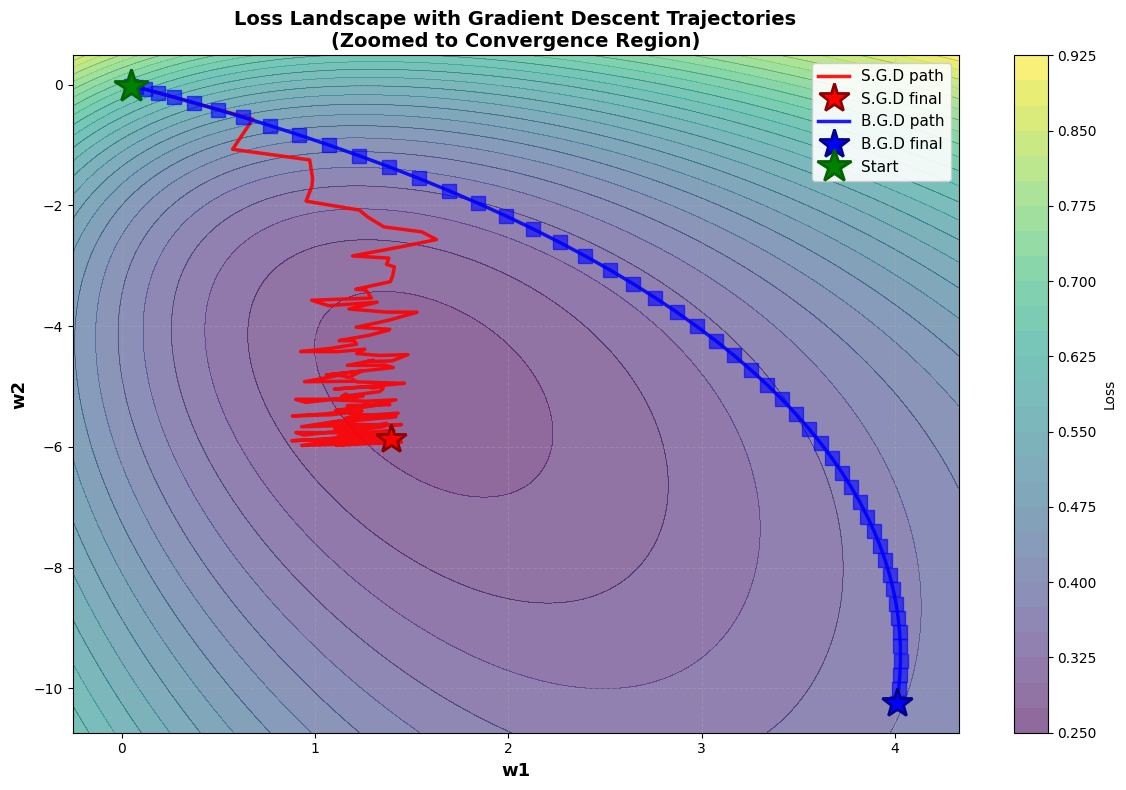

In [24]:
# First, let's find the actual parameter ranges from your results
sgd_params = np.array(param_history_sgd)
bgd_params = np.array(param_history_bgd)

# Get the bounds of where the algorithms actually explored
w1_min = min(sgd_params[:, 0].min(), bgd_params[:, 0].min()) - 0.3
w1_max = max(sgd_params[:, 0].max(), bgd_params[:, 0].max()) + 0.3
w2_min = min(sgd_params[:, 1].min(), bgd_params[:, 1].min()) - 0.5
w2_max = max(sgd_params[:, 1].max(), bgd_params[:, 1].max()) + 0.5

# Recompute loss landscape with better bounds
def compute_loss_landscape(X, y, w1_range, w2_range, b_fixed=0):
    """Compute loss over a grid of w1 and w2 values"""
    w1_vals = np.linspace(w1_range[0], w1_range[1], 100)
    w2_vals = np.linspace(w2_range[0], w2_range[1], 100)
    W1, W2 = np.meshgrid(w1_vals, w2_vals)
    L = np.zeros_like(W1)
    
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            z = W1[i, j] * X[:, 0] + W2[i, j] * X[:, 1] + b_fixed
            a = expit(z)
            L[i, j] = -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))
    
    return w1_vals, w2_vals, L

w1_vals, w2_vals, L = compute_loss_landscape(X, y, (w1_min, w1_max), (w2_min, w2_max), b_fixed=0)

# Now plot with better visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Loss landscape - use log scale for better contrast
contourf = ax.contourf(w1_vals, w2_vals, L, levels=30, cmap='viridis', alpha=0.6)
ax.contour(w1_vals, w2_vals, L, levels=15, colors='black', alpha=0.2, linewidths=0.5)

# Plot trajectories
ax.plot(sgd_params[::30, 0], sgd_params[::30, 1], 'r-', linewidth=2.5, label='S.G.D path', alpha=0.9)
ax.plot(sgd_params[-1, 0], sgd_params[-1, 1], 'r*', markersize=22, label='S.G.D final', markeredgecolor='darkred', markeredgewidth=2)

ax.plot(bgd_params[:, 0], bgd_params[:, 1], 'b-', linewidth=2.5, label='B.G.D path', alpha=0.9)
ax.plot(bgd_params[:, 0], bgd_params[:, 1], 'bs', markersize=10, alpha=0.6)
ax.plot(bgd_params[-1, 0], bgd_params[-1, 1], 'b*', markersize=22, label='B.G.D final', markeredgecolor='darkblue', markeredgewidth=2)

# Mark starting point
ax.plot(sgd_params[0, 0], sgd_params[0, 1], 'g*', markersize=25, label='Start', markeredgecolor='darkgreen', markeredgewidth=2)

cbar = plt.colorbar(contourf, ax=ax, label='Loss')
ax.set_xlabel('w1', fontsize=13, fontweight='bold')
ax.set_ylabel('w2', fontsize=13, fontweight='bold')
ax.legend(loc='upper right', fontsize=11, framealpha=0.9)
ax.set_title('Loss Landscape with Gradient Descent Trajectories\n(Zoomed to Convergence Region)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [25]:
# Compare the final losses
sgd_z = sgd_params[-1, 0] * X[:, 0] + sgd_params[-1, 1] * X[:, 1] + 0
bgd_z = bgd_params[-1, 0] * X[:, 0] + bgd_params[-1, 1] * X[:, 1] + 0

sgd_a = expit(sgd_z)
bgd_a = expit(bgd_z)

sgd_loss = -np.mean(y * np.log(sgd_a) + (1 - y) * np.log(1 - sgd_a))
bgd_loss = -np.mean(y * np.log(bgd_a) + (1 - y) * np.log(1 - bgd_a))

print(f"S.G.D final loss: {sgd_loss:.6f}")
print(f"B.G.D final loss: {bgd_loss:.6f}")
print(f"S.G.D found better minimum: {sgd_loss < bgd_loss}")

S.G.D final loss: 0.269966
B.G.D final loss: 0.373054
S.G.D found better minimum: True


## With Vectorization

### Using B.G.D

In [79]:
epochs = 100
losses = []
# np.random.seed(42)
W = np.random.randn(2,1)
b = np.random.randn(1) 

for epoch in range(epochs):
    Z = W.T @ X + b # (1xm)
    A = expit(Z) # (1xm)
    J = -np.mean(y*np.log(A) + (1 - y)*np.log(1 - A))
    
    losses.append(J)
    dZ = A - y # (1xm)
    dW = (X @ dZ.T) / m  # (2x1)
    db = np.mean(dZ)      # (1,)

    W = W - lr * dW
    b = b - lr * db

    print(f"Epoch {epoch} - Loss: {J}") if epoch % 10 == 0 else None
    
print("\nFinal params learned:\nW:", W.flatten(), "b:", b)

Epoch 0 - Loss: 0.5228434550489174
Epoch 10 - Loss: 0.4826119965594604
Epoch 20 - Loss: 0.45530185091003816
Epoch 30 - Loss: 0.4351844524696694
Epoch 40 - Loss: 0.4194599452186867
Epoch 50 - Loss: 0.4066459564694271
Epoch 60 - Loss: 0.39589042996064644
Epoch 70 - Loss: 0.38666568890559355
Epoch 80 - Loss: 0.3786235010857606
Epoch 90 - Loss: 0.37152176191362446

Final params learned:
W: [ 1.20221473 -1.42192398] b: [-0.28887245]


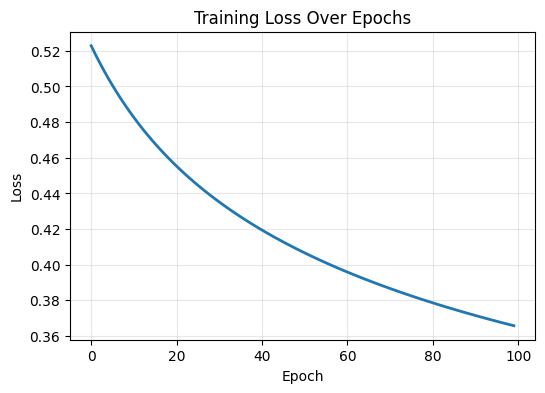

In [80]:
# Plot 1: Training Loss
plt.figure(figsize=(6, 4))
plt.plot(losses, linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True, alpha=0.3)
plt.show()

In [81]:
# Predict on Training set
y_Z =  W.T @ X + b # (1xm)
y_pred = expit(y_Z) # (1xm)
y_pred_binary = (y_pred > 0.5).astype(int).reshape(-1)

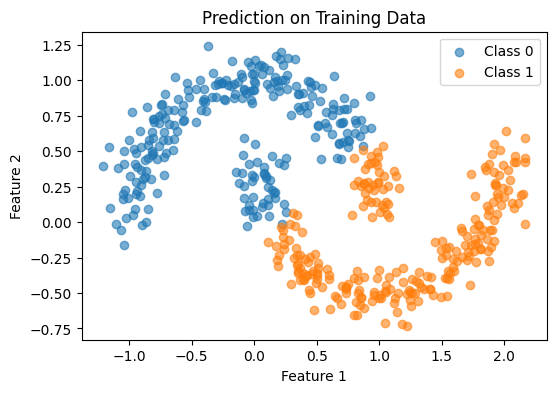

In [82]:
# Prediction on training data
plt.figure(figsize=(6, 4))
plt.scatter(X.T[y_pred_binary == 0, 0], X.T[y_pred_binary == 0, 1], label='Class 0', alpha=0.6)
plt.scatter(X.T[y_pred_binary == 1, 0], X.T[y_pred_binary == 1, 1], label='Class 1', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Prediction on Training Data')
plt.show()

In [83]:
# Calculate accuracy
accuracy = np.mean(y_pred_binary == y)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score

precision = precision_score(y, y_pred_binary)
recall = recall_score(y, y_pred_binary)
f1 = f1_score(y, y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y, y_pred_binary)
print(f"\nConfusion Matrix:\n{cm}")

# Calculate specificity and sensitivity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print(f"\nSensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

Accuracy: 0.8260
Precision: 0.8273
Recall: 0.8240
F1-Score: 0.8257

Confusion Matrix:
[[207  43]
 [ 44 206]]

Sensitivity (True Positive Rate): 0.8240
Specificity (True Negative Rate): 0.8280


# Shallow NN (3 layers)

In [109]:
X = X.T
y = y.reshape(1, -1)

In [158]:
lr = 0.5
m = X.shape[1]
epochs = 100
losses = []

w1 = np.random.randn(2,3)
b1 = np.zeros((3,1))
w2 = np.random.randn(3,2)
b2 = np.zeros((2,1))
w3 = np.random.randn(2,1)
b3 = np.zeros((1,1))

for epoch in range(epochs):
    # Forward Propogation
    Z1 = w1.T @ X + b1
    A1 = np.tanh(Z1)  # expit(Z1)
    assert A1.shape == (3, m)

    Z2 = w2.T @ A1 + b2
    A2 = np.tanh(Z2) # expit(Z2)
    assert A2.shape == (2, m)

    Z3 = w3.T @ A2 + b3
    A3 = expit(Z3)
    assert A3.shape == (1, m)

    J = -np.mean(y * np.log(A3) + (1-y) * np.log(1-A3))
    pp(f"Epoch {epoch+1} | Training Loss: {J.round(2)}") if (epoch+1) % 10 == 0 else None
    losses.append(J)

    # Backward Propogation
    dZ3 = A3 - y
    assert dZ3.shape == Z3.shape

    dW3 = (A2 @ dZ3.T) / m
    db3 = dZ3.mean(axis=1, keepdims=True)
    assert dW3.shape == w3.shape
    assert db3.shape == b3.shape

    dZ2 = (w3 @ dZ3) * (1 - np.power(A2, 2)) # w3 @ dZ3 * (A2 * (1-A2))
    assert dZ2.shape == Z2.shape

    dW2 = (A1 @ dZ2.T) / m
    db2 = dZ2.mean(axis=1, keepdims=True)
    assert dW2.shape == w2.shape
    assert db2.shape == b2.shape

    dZ1 = (w2 @ dZ2) * (1 - np.power(A1, 2)) # w2 @ dZ2 * (A1 * (1-A1))
    assert dZ1.shape == Z1.shape

    dW1 = (X @ dZ1.T) / m
    db1 = dZ1.mean(axis=1, keepdims=True)
    assert dW1.shape == w1.shape
    assert db1.shape == b1.shape

    # Update Parameters
    w3 = w3 - lr*dW3
    b3 = b3 - lr*db3
    w2 = w2 - lr*dW2
    b2 = b2 - lr*db2
    w1 = w1 - lr*dW1
    b1 = b1 - lr*db1


'Epoch 10 | Training Loss: 0.37'
'Epoch 20 | Training Loss: 0.32'
'Epoch 30 | Training Loss: 0.3'
'Epoch 40 | Training Loss: 0.28'
'Epoch 50 | Training Loss: 0.27'
'Epoch 60 | Training Loss: 0.24'
'Epoch 70 | Training Loss: 0.21'
'Epoch 80 | Training Loss: 0.18'
'Epoch 90 | Training Loss: 0.15'
'Epoch 100 | Training Loss: 0.13'


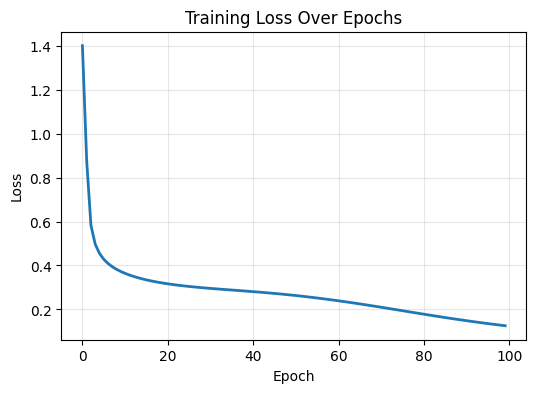

In [159]:
# Plot 1: Training Loss
plt.figure(figsize=(6, 4))
plt.plot(losses, linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True, alpha=0.3)
plt.show()

In [160]:
# Predict on Training set
Z1 = w1.T @ X + b1
A1 = np.tanh(Z1)  # expit(Z1)
assert A1.shape == (3, m)

Z2 = w2.T @ A1 + b2
A2 = np.tanh(Z2) # expit(Z2)
assert A2.shape == (2, m)

Z3 = w3.T @ A2 + b3
A3 = expit(Z3)
y_pred = A3
y_pred_binary = (y_pred > 0.5).astype(int).reshape(-1)

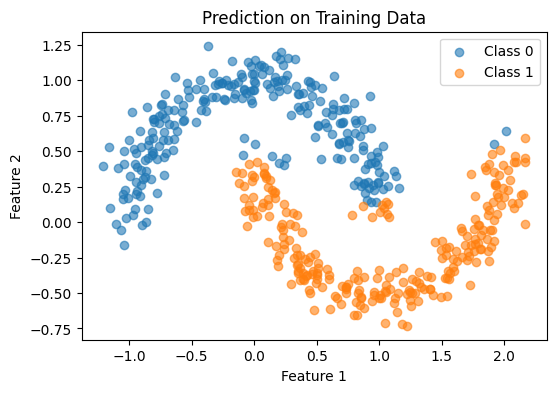

In [161]:
# Prediction on training data
plt.figure(figsize=(6, 4))
plt.scatter(X.T[y_pred_binary == 0, 0], X.T[y_pred_binary == 0, 1], label='Class 0', alpha=0.6)
plt.scatter(X.T[y_pred_binary == 1, 0], X.T[y_pred_binary == 1, 1], label='Class 1', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Prediction on Training Data')
plt.show()

In [ ]:
# Why the fuck is my NN learning a linear decision boundary no matter what I change. 
# Wow, just changing the activation function from sigmoid to tanh really solved the problem. So sigmoid is shit even for simple tasks.

In [162]:
# Calculate accuracy
accuracy = np.mean(y_pred_binary == y)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score

precision = precision_score(y.reshape(-1), y_pred_binary)
recall = recall_score(y.reshape(-1), y_pred_binary)
f1 = f1_score(y.reshape(-1), y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y.reshape(-1), y_pred_binary)
print(f"\nConfusion Matrix:\n{cm}")

# Calculate specificity and sensitivity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print(f"\nSensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

Accuracy: 0.9620
Precision: 0.9602
Recall: 0.9640
F1-Score: 0.9621

Confusion Matrix:
[[240  10]
 [  9 241]]

Sensitivity (True Positive Rate): 0.9640
Specificity (True Negative Rate): 0.9600


# Dynamic Framework for NN

In [137]:
import numpy as np

class Layer:
    def forward(self, input_data):
        pass
    def backward(self, output_gradient, learning_rate):
        pass

class Dense(Layer):
    def __init__(self, input_size, output_size):
        # User Request: Weights are (Input, Output)
        # Xavier intialization for tanh activation
        self.weights = np.random.randn(input_size, output_size) * np.sqrt(1. / input_size)
        # We use He Initialization
        # self.weights = np.random.randn(input_size, output_size) * np.sqrt(2. / input_size)
        self.bias = np.zeros((output_size, 1)) # Column vector

    def forward(self, input_data):
        self.input = input_data
        # Matrix Op: (Output, Input) @ (Input, m) -> (Output, m)
        # Since self.weights is (Input, Output), we transpose it.
        return np.dot(self.weights.T, self.input) + self.bias

    def backward(self, output_gradient, learning_rate):
        # output_gradient (dZ) shape: (n_out, m)
        m = self.input.shape[1]
        
        # 1. Calculate Gradients
        # dW shape target: (n_in, n_out)
        # Math: X @ dZ.T
        weights_gradient = np.dot(self.input, output_gradient.T) / m
        
        # db shape target: (n_out, 1)
        # Sum across columns (axis 1) because columns are samples
        bias_gradient = np.sum(output_gradient, axis=1, keepdims=True) / m
        
        # 2. Calculate dA_prev (Gradient for layer below)
        # dA_prev shape target: (n_in, m)
        # Math: W @ dZ
        input_gradient = np.dot(self.weights, output_gradient)
        
        # 3. Update Parameters
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * bias_gradient
        
        return input_gradient

class Activation(Layer):
    def __init__(self, activation_name):
        self.name = activation_name
        self.activations = {
            'tanh': np.tanh,
            'sigmoid': lambda x: 1 / (1 + np.exp(-x)),
            'relu': lambda x: np.maximum(0, x)
        }
        self.derivatives = {
            'tanh': lambda x: 1 - np.tanh(x)**2,
            'sigmoid': lambda x: (1 / (1 + np.exp(-x))) * (1 - (1 / (1 + np.exp(-x)))),
            'relu': lambda x: (x > 0).astype(float)
        }
        
    def forward(self, input_data):
        self.input = input_data 
        return self.activations[self.name](self.input)

    def backward(self, output_gradient, learning_rate):
        # Element-wise multiplication
        return output_gradient * self.derivatives[self.name](self.input)

class NeuralNetwork:
    def __init__(self):
        self.layers = []
        self.loss_history = []

    def add(self, layer):
        self.layers.append(layer)

    def predict(self, input_data):
        output = input_data
        for layer in self.layers:
            output = layer.forward(output)
        return output

    def train(self, X, y, epochs, learning_rate):
        # Expects X shape: (n_features, m_samples)
        # Expects y shape: (1, m_samples)
        
        m = X.shape[1]
        
        for epoch in range(epochs):
            # 1. Forward Pass
            output = X
            for layer in self.layers:
                output = layer.forward(output)
            
            # 2. Loss (Binary Cross Entropy)
            # Clip output to avoid log(0) error
            output = np.clip(output, 1e-15, 1 - 1e-15)
            loss = -np.sum(y * np.log(output) + (1 - y) * np.log(1 - output)) / m
            self.loss_history.append(loss)
            
            # 3. Backward Pass
            # dLoss/dA_final
            grad = - (np.divide(y, output) - np.divide(1 - y, 1 - output))
            
            for layer in reversed(self.layers):
                grad = layer.backward(grad, learning_rate)
                
            if (epoch+1) % int(0.1 * epochs) == 0:
                print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}")

In [139]:
from sklearn.datasets import make_moons

# 1. Prepare Data (Ng Convention: Columns are Samples)
X_raw, y_raw = make_moons(n_samples=500, noise=0.1, random_state=42)

# X shape: (2, 500) -> 2 Features, 500 Samples
X = X_raw.T 

# y shape: (1, 500) -> 1 Output, 500 Samples
y = y_raw.reshape(1, -1) 

# 2. Build Model
nn = NeuralNetwork()

# Layer 1: 2 Inputs -> 10 Neurons
nn.add(Dense(2, 3))
nn.add(Activation('tanh'))

# Layer 2: 10 Inputs -> 10 Neurons
nn.add(Dense(3, 2))
nn.add(Activation('tanh'))

# Layer 3: 10 Inputs -> 1 Neuron
nn.add(Dense(2, 1))
nn.add(Activation('sigmoid'))

# 3. Train
nn.train(X, y, epochs=300, learning_rate=0.3)

Epoch 30/300 - Loss: 0.3230
Epoch 60/300 - Loss: 0.2815
Epoch 90/300 - Loss: 0.2718
Epoch 120/300 - Loss: 0.2653
Epoch 150/300 - Loss: 0.2567
Epoch 180/300 - Loss: 0.2409
Epoch 210/300 - Loss: 0.2109
Epoch 240/300 - Loss: 0.1666
Epoch 270/300 - Loss: 0.1214
Epoch 300/300 - Loss: 0.0872


In [140]:
y_pred = nn.predict(X)
y_pred_binary = (y_pred > 0.5).astype(float).reshape(-1, 1)

In [146]:
X.shape

(2, 500)

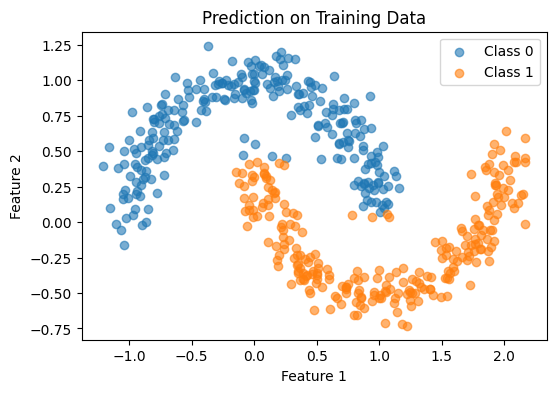

In [151]:
# Prediction on training data
plt.figure(figsize=(6, 4))
plt.scatter(X[0, y_pred_binary.flatten() == 0], X[1, y_pred_binary.flatten() == 0], label='Class 0', alpha=0.6)
plt.scatter(X[0, y_pred_binary.flatten() == 1], X[1, y_pred_binary.flatten() == 1], label='Class 1', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Prediction on Training Data')
plt.show()

In [157]:
# Calculate accuracy
accuracy = np.mean(y_pred_binary.reshape(1, -1) == y)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score

precision = precision_score(y.reshape(-1), y_pred_binary)
recall = recall_score(y.reshape(-1), y_pred_binary)
f1 = f1_score(y.reshape(-1), y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y.reshape(-1), y_pred_binary)
print(f"\nConfusion Matrix:\n{cm}")

# Calculate specificity and sensitivity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print(f"\nSensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")

Accuracy: 0.9820
Precision: 0.9839
Recall: 0.9800
F1-Score: 0.9820

Confusion Matrix:
[[246   4]
 [  5 245]]

Sensitivity (True Positive Rate): 0.9800
Specificity (True Negative Rate): 0.9840
